Curren working dir /Users/philipkeogh/Documents/4_Semester/Deep_Learning/Assignment/src
Working dir: /Users/philipkeogh/Documents/4_Semester/Deep_Learning/Assignment/src
                                            filepath  age age_group  label
0  /Users/philipkeogh/Documents/4_Semester/Deep_L...   18      teen      1
1  /Users/philipkeogh/Documents/4_Semester/Deep_L...   48    mature      4
2  /Users/philipkeogh/Documents/4_Semester/Deep_L...   24     youth      2
3  /Users/philipkeogh/Documents/4_Semester/Deep_L...   10     child      0
4  /Users/philipkeogh/Documents/4_Semester/Deep_L...   55    mature      4
5  /Users/philipkeogh/Documents/4_Semester/Deep_L...   81     older      5
6  /Users/philipkeogh/Documents/4_Semester/Deep_L...   28     youth      2
7  /Users/philipkeogh/Documents/4_Semester/Deep_L...   65     older      5
8  /Users/philipkeogh/Documents/4_Semester/Deep_L...   28     youth      2
9  /Users/philipkeogh/Documents/4_Semester/Deep_L...   37       mid      3
  age

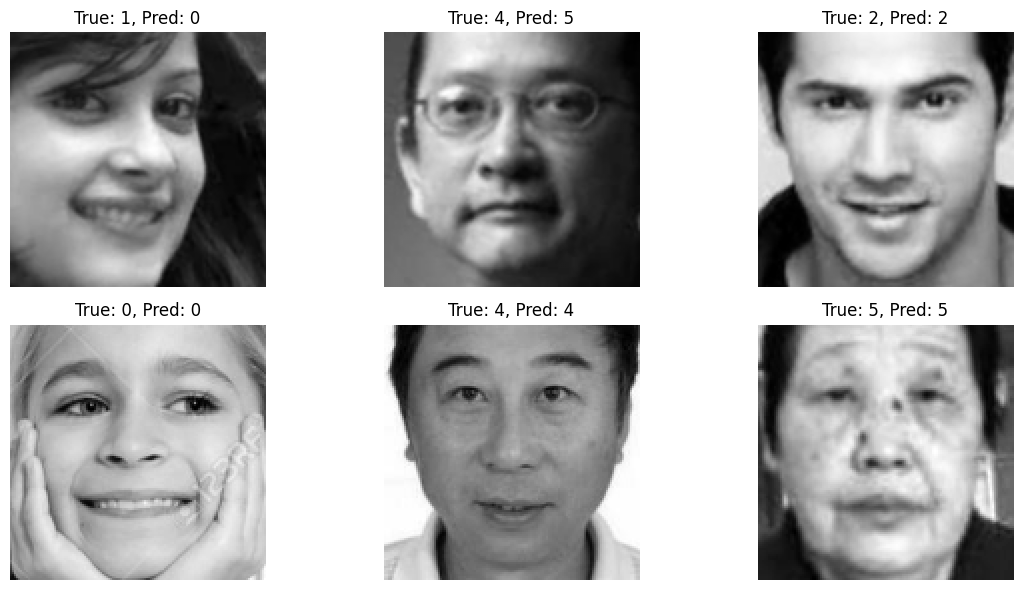

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


2025-04-23 21:41:33.701480: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


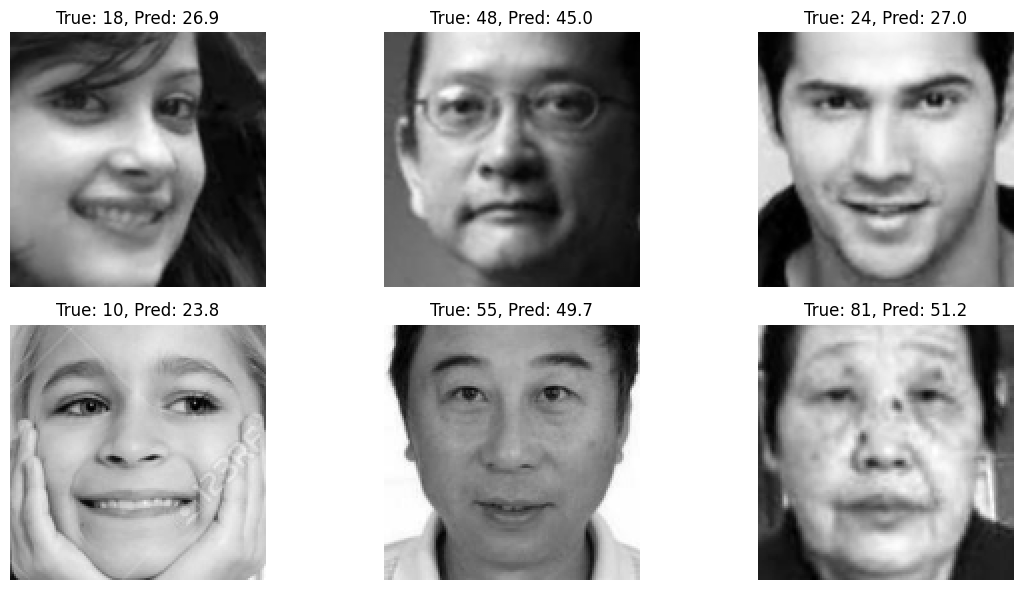

2025-04-23 21:41:34.062510: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from data_loader import load_dataset
import os
from pathlib import Path
print("Curren working dir", os.getcwd())

print("Working dir:", os.getcwd())
# --- Configuration ---
IMG_SIZE = (128, 128)
GRAYSCALE = True
BATCH_SIZE = 32

# Paths to best models and test data
CLASSIFICATION_MODEL_PATH = '../best_models/run12_fast_labelled_filtered_relu_gap_128_shallow.keras'
REGRESSION_MODEL_PATH = '../best_models/run17_regression_3x3_relu_128_l2_dropout.keras'
TEST_CSV = '../processed_csvs/test_filtered.csv'

root_path = Path(os.getcwd()).parent 
csv = pd.read_csv(TEST_CSV)
csv['filepath'] = csv['filepath'].apply(lambda x: str(root_path / x))
csv.to_csv(TEST_CSV, index=False) 


# --- Load Datasets ---
test_ds_classification = load_dataset(
    csv_path=TEST_CSV,
    img_size=IMG_SIZE,
    task='classification',
    grayscale=GRAYSCALE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_ds_regression = load_dataset(
    csv_path=TEST_CSV,
    img_size=IMG_SIZE,
    task='regression',
    grayscale=GRAYSCALE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# --- Load and Evaluate Models ---
clf_model = tf.keras.models.load_model(CLASSIFICATION_MODEL_PATH)
clf_results = clf_model.evaluate(test_ds_classification, verbose=0)
print(f"Classification Accuracy: {clf_results[1]*100:.2f}% | Loss: {clf_results[0]:.4f}")

reg_model = tf.keras.models.load_model(REGRESSION_MODEL_PATH)
reg_results = reg_model.evaluate(test_ds_regression, verbose=0)
print(f"Regression MAE: {reg_results[1]:.2f} | MSE: {reg_results[0]:.2f}")

# --- Visualize Predictions: Classification ---
for images, labels in test_ds_classification.take(1):
    preds = clf_model.predict(images)
    pred_classes = tf.argmax(preds, axis=1)
    true_classes = tf.argmax(labels, axis=1)

    print("\nSoftmax predictions (first 6 samples):")
    for i in range(6):
        print(f"Image {i}:")
        print(f"  Softmax probs: {preds[i]}")
        print(f"  True class: {true_classes[i].numpy()}, Pred class: {pred_classes[i].numpy()}")
        print("-" * 40)

    plt.figure(figsize=(12, 6))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f"True: {true_classes[i]}, Pred: {pred_classes[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# --- Visualize Predictions: Regression ---
for images, true_ages in test_ds_regression.take(1):
    predicted_ages = reg_model.predict(images).flatten()

    plt.figure(figsize=(12, 6))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f"True: {int(true_ages[i])}, Pred: {predicted_ages[i]:.1f}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
